# Texas Licenses

I originally got this dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv("licfile.csv")

df.head()

C:\Users\aefar\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
df = pd.read_csv("licfile.csv", names = ['LICTYPE','LICNUMBER','BIZCOUNTY','BIZNAME','BIZLINE1',
                                         'BIZLINE2','BIZCITYSTATE','BIZTELEPHONE','EXPIRATION',
                                         'OWNER','MAILLINE1','MAILINE2','MAILCITYSTATE','MAILCOUNTYCODE',
                                         'MAILCOUNTY','MAILZIP','TELEPHONE','LICSUBTYPE','CEFLAG'])
df.head()

C:\Users\aefar\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [4]:
df = pd.read_csv("licfile.csv",names = ['LICTYPE','LICNUMBER','BIZCOUNTY','BIZNAME','BIZLINE1',
                                         'BIZLINE2','BIZCITYSTATE','BIZTELEPHONE','EXPIRATION',
                                         'OWNER','MAILLINE1','MAILINE2','MAILCITYSTATE','MAILCOUNTYCODE',
                                         'MAILCOUNTY','MAILZIP','TELEPHONE','LICSUBTYPE','CEFLAG'], 
                 dtype={'EXPIRATION':str,'LICNUMBER':str,'MAILCOUNTYCODE':str,'MAILZIP':str,
                        'TELEPHONE':str})

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [5]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILINE2           object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

You can use list slicing with `.str` (we did `dt.per_name.str[:4]` for the home data stuff once), `pd.to_datetime`, or a hundred other methods.

In [6]:
df['EXPIRATION'] = pd.to_datetime(df['EXPIRATION'], exact=False, format='%y%m%d')

Check the first five expirations to make sure they look right.

In [7]:
df.EXPIRATION

0        2008-10-20
1        2012-02-09
2        2009-02-06
3        2011-04-20
4        2002-02-05
            ...    
597811   2001-02-03
597812   2001-02-03
597813   2001-02-07
597814   2002-01-03
597815   2002-01-06
Name: EXPIRATION, Length: 597816, dtype: datetime64[ns]

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [8]:
df.LICTYPE.value_counts()

Cosmetology Operator                              151206
Apprentice Electrician                            110593
Cosmetology Manicurist                             49563
Journeyman Electrician                             38170
A/C Technician                                     27959
                                                   ...  
Mobile Cosmetology Manicure Specialty Saloon           2
Cosmetology Wig Instructor                             2
Mobile Cosmetology Esthetician/Manicure Saloon         2
Licensed Court Interpreter CE Provider                 2
Legal Service Contract Admin                           1
Name: LICTYPE, Length: 103, dtype: int64

## 6. What are the top 10 least common?

In [9]:
df.LICTYPE.value_counts(ascending=True).sort_values().head(10).sort_values(ascending=False)

Elevator Responsible Party CE Provider             8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Braiding Shop                          4
Barber Hair Weaving Shop                           4
Booting CE Provider                                3
Mobile Cosmetology Manicure Specialty Saloon       2
Cosmetology Wig Instructor                         2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Licensed Court Interpreter CE Provider             2
Legal Service Contract Admin                       1
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [10]:
# Yes I know I left this in here, it's a learning experience!
#df[df['LICTYPE'].str.contains("Electrician")]

## 8. How many of the rows of LICTYPE are NaN?

In [11]:
df['LICTYPE'].isnull().sum()

7086

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [12]:
df.LICTYPE.fillna(False)

0                      Associate Auctioneer
1                      Associate Auctioneer
2                      Associate Auctioneer
3                      Associate Auctioneer
4                      Associate Auctioneer
                        ...                
597811    Water Well Driller/Pump Installer
597812    Water Well Driller/Pump Installer
597813    Water Well Driller/Pump Installer
597814    Water Well Driller/Pump Installer
597815    Water Well Driller/Pump Installer
Name: LICTYPE, Length: 597816, dtype: object

In [13]:
df[df['LICTYPE'].str.contains("Electrician").fillna(False)]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2005-02-07,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2010-02-12,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2005-02-08,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2006-01-08,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2010-02-06,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569544,Apprentice Sign Electrician,393609,PARKER,"ORTEGA, JUAN",NaN,NaN,NaN,NaN,2003-01-20,"ORTEGA, JUAN",128 JUAN CT,NaN,HUDSON OAKS TX 76087-8337,0367,PARKER,76087,8173746117,SA,N
569545,Apprentice Sign Electrician,393610,OUT OF STATE,"BARR, SYLVIA M",NaN,NaN,NaN,NaN,2003-01-20,"BARR, SYLVIA M",1015 RIVERVIEW DR,NaN,FAIRMONT WV 26554-8309,0999,OUT OF STATE,26554,3047779007,SA,N
569546,Apprentice Sign Electrician,393611,OUT OF STATE,"MALFAVON, SALVADOR H",NaN,NaN,NaN,NaN,2003-01-20,"MALFAVON, SALVADOR H",1237 E CENTER ST,NaN,KINGSPORT TN 37660-4945,0999,OUT OF STATE,37660,4237656317,SA,N
569547,Apprentice Sign Electrician,393612,WICHITA,"ARANDA, JOSE A SR",NaN,NaN,NaN,NaN,2003-01-20,"ARANDA, JOSE A SR",1108 IRELAND ST,NaN,WICHITA FALLS TX 76301-7837,0485,WICHITA,76301,9408674318,SA,N


## 10. What's the most popular kind of electrician?

In [14]:
df[df['LICTYPE'].str.contains('Electrician').fillna(False)].LICSUBTYPE.value_counts()

AE                                     110593
JE                                      38170
ME                                      16810
SA                                       3994
MN                                       1184
MS                                        542
JS                                        391
Electrician                               109
Electrician Apprenticeship Programs        45
Name: LICSUBTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

<AxesSubplot:>

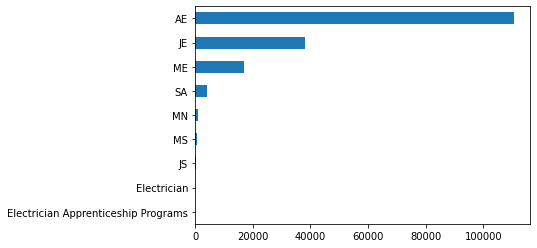

In [15]:
df[df['LICTYPE'].str.contains('Electrician').fillna(False)].LICSUBTYPE.value_counts(ascending=True).plot(kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [16]:
df[df['LICTYPE'].str.contains('Electrician')\
   .fillna(False)].LICSUBTYPE.str.contains('SA').value_counts()

False    167844
True       3994
Name: LICSUBTYPE, dtype: int64

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [17]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2008-10-20,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2012-02-09,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2009-02-06,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2011-04-20,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2002-02-05,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


In [18]:
df['OWNER'].str.extract(r'(^.*),')

,0
0,RISINGER
1,WILLIAMS
2,GUEVARA
3,BOWERS
4,DEMSKY
...,...
597811,ABEL
597812,GRAY
597813,MAYER
597814,FRIESEN


## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [19]:
df['LASTNAME'] = df['OWNER'].str.extract(r'(^.*),')

In [20]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2008-10-20,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2012-02-09,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2009-02-06,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2011-04-20,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2002-02-05,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


# 15. What are the ten most popular last names?

In [21]:
df.LASTNAME.value_counts().head(10)

NGUYEN       22283
TRAN          8135
LE            5605
GARCIA        5574
MARTINEZ      4701
RODRIGUEZ     4625
HERNANDEZ     4389
PHAM          3996
GONZALEZ      3634
SMITH         3208
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [22]:
df[df['LASTNAME'] == 'NGUYEN']['LICTYPE'].value_counts().head()

Cosmetology Manicurist     12855
Cosmetology Operator        4039
Cosmetology Esthetician     2881
Cosmetologist               1874
Apprentice Electrician       195
Name: LICTYPE, dtype: int64

In [23]:
df[df['LASTNAME'] == 'TRAN']['LICTYPE'].value_counts().head()

Cosmetology Manicurist     4674
Cosmetology Operator       1474
Cosmetology Esthetician    1032
Cosmetologist               712
Apprentice Electrician       95
Name: LICTYPE, dtype: int64

In [24]:
df[df['LASTNAME'] == 'LE']['LICTYPE'].value_counts().head()

Cosmetology Manicurist     3276
Cosmetology Operator        953
Cosmetology Esthetician     730
Cosmetologist               497
A/C Technician               43
Name: LICTYPE, dtype: int64

The background of this [is interesting](https://www.npr.org/2019/05/19/724452398/how-vietnamese-americans-took-over-the-nails-business-a-documentary) and [tragic](https://www.nytimes.com/2015/05/10/nyregion/at-nail-salons-in-nyc-manicurists-are-underpaid-and-unprotected.html).

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [25]:
## Come back to this one.##

df[df.LASTNAME.isin(['NGUYEN', 'TRAN', 'LE'])].LICTYPE.value_counts()

##df.groupby('LASTNAME').LICTYPE.head(10)

##df.groupby([df['LASTNAME'].sort_values()]['LICTYPE'])

Cosmetology Manicurist                      20805
Cosmetology Operator                         6466
Cosmetology Esthetician                      4643
Cosmetologist                                3083
Apprentice Electrician                        327
A/C Technician                                281
Journeyman Electrician                         91
Cosmetology Operator Instructor                70
Barber Manicurist                              37
Master Electrician                             36
Barber, Class A                                36
Property Tax Appraiser                         21
Apprentice Sign Electrician                    20
Cosmetology Manicurist Instructor              12
Used Auto Parts Recycler Employee              10
Legal Service Contract Sales Rep               10
Maintenance Electrician                         8
Tow Truck Operator (Incident Management)        7
Tow Truck Operator (Consent Tow)                7
Master Sign Electrician                         6


## 19. Most popular license for anyone with a last name that ENDS in `-ko`

The answer is not `.str.contains('ko')`, but it isn't necessarily too different.

* One way involves a `.str.` method that check if a string ends with something,
* the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before)

If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [26]:
df['LASTNAME'].str.endswith("KO").value_counts()

False    516035
True        180
Name: LASTNAME, dtype: int64

## 20. Get that as a percentage

In [27]:
df['LASTNAME'].str.endswith("KO").value_counts(normalize=True)

False    0.999651
True     0.000349
Name: LASTNAME, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [28]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [29]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [30]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [31]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [32]:
#df['OWNER'].str.extract(r", (\w*) ", expand=False)

df['OWNER'].str.extract(r"^.*,\s(\w*)\s", expand=False)

0               JIM
1               JON
2              JUAN
3             JAMES
4              JOHN
            ...    
597811       JUSTIN
597812      MATTHEW
597813        DAVID
597814    FRANCISCO
597815        DAVID
Name: OWNER, Length: 597816, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [33]:
df['FIRSTNAME'] = df['OWNER'].str.extract(r"^.*,\s(.*)\s", expand=False)

# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [34]:
df.FIRSTNAME.isnull().sum()

212305

What do their names look like?

In [48]:
## I don't know how to answer this.

df[df.FIRSTNAME.isnull()]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME
1501,A/C Technician,4098,ELLIS,"PERRY,MARK E",NaN,NaN,NaN,NaN,2008-02-02,"PERRY,MARK E",...,NaN,NaN,NaN,ELLIS,76065,NaN,REG,N,PERRY,NaN
2539,A/C Technician,7405,HARRIS,"RENDON, JOHN-HENRY",NaN,NaN,NaN,NaN,2008-10-20,"RENDON, JOHN-HENRY",...,NaN,NaN,NaN,HARRIS,77375,NaN,REG,N,RENDON,NaN
4264,A/C Technician,13511,FORT BEND,"TIAN, LIAN-MING",NaN,NaN,NaN,NaN,2003-02-20,"TIAN, LIAN-MING",...,NaN,NaN,NaN,FORT BEND,77479,NaN,REG,N,TIAN,NaN
5826,A/C Technician,19423,TARRANT,"MEJIA ,LUIS GILBERTO JR",NaN,NaN,NaN,NaN,2002-02-08,"MEJIA ,LUIS GILBERTO JR",...,NaN,NaN,NaN,TARRANT,76108,NaN,REG,N,MEJIA,NaN
8311,A/C Technician,29566,MATAGORDA,"WILLIAMS, JAN-MICHAEL",NaN,NaN,NaN,NaN,2005-02-12,"WILLIAMS, JAN-MICHAEL",...,NaN,NaN,NaN,MATAGORDA,77482,NaN,REG,N,WILLIAMS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590400,Used Auto Parts Recycler,1516,DALLAS,A & M AUTO PARTS,NaN,NaN,NaN,NaN,2002-02-08,A & M AUTO PARTS,...,NaN,DALLAS TX 75216-4138,0113,DALLAS,75216,2143711500,RECYCLER,N,NaN,NaN
590401,Used Auto Parts Recycler,1517,TARRANT,STEVENS CORE SUPPLY INC,NaN,NaN,NaN,NaN,2003-01-20,STEVENS CORE SUPPLY INC,...,NaN,SANSOM PARK TX 76114,0439,TARRANT,76114,8173329820,RECYCLER,N,NaN,NaN
591093,Used Auto Parts Recycler Employee,3427,TAYLOR,"LOWERY,STEVEN R",NaN,NaN,NaN,NaN,2011-06-20,"LOWERY,STEVEN R",...,NaN,ABILENE TX 79606,0441,TAYLOR,79606,NaN,EMPLOYEE,N,LOWERY,NaN
593869,VSF Employee,10082,MCLENNAN,"HOFFMAN, AIMEE'",NaN,NaN,NaN,NaN,2001-02-05,"HOFFMAN, AIMEE'",...,NaN,WACO,0309,MCLENNAN,76712,NaN,NaN,N,HOFFMAN,NaN


## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [36]:
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = df["OWNER"].str.extract(", (\w*)$", expand=False)

How many empty first names do we have now?

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [50]:
df.FIRSTNAME.value_counts()

JOSE         6462
MICHAEL      5447
DAVID        4960
MARIA        4648
JAMES        4217
             ... 
DOLLYBETH       1
QUILES          1
YONEKO          1
MYISHA          1
SHIVELE         1
Name: FIRSTNAME, Length: 51609, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` or `na=False` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [51]:
## Come back to this one as well.

df[df.LICTYPE.isin(['COSMETOLOGY ESTHETICIAN', 'COSMETOLOGIST', 'COSMETOLOGY OPERATOR'])].FIRSTNAME.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: FIRSTNAME, dtype: object

## 27. Most popular first names for anything involving electricity?

In [39]:
## Come back to this one as well...as well

## 28. Can we be any more obnoxious in this assignment?

A terrible thing that data analysts are often guilty of is using names to make assumptions about people. Beyond stereotypes involving last names, first names are often used to predict someone's race, ethnic background, or gender.

And if that isn't bad enough: if we were looking for Python libraries to do this sort of analysis, we'd come across [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again.

How'd it happen? [On Github, in a pull request!](https://github.com/bmuller/gender_detector/pull/14) Neat, right?

But yeah: apparently Python didn't get the message.

The sexmachine package doesn't work on Python 3 because it's from 300 BC, so we're going to use a Python 3 fork with the less problematic name [gender guesser](https://pypi.python.org/pypi/gender-guesser/).

#### Use `pip` or `pip3` to install gender-guesser.

In [40]:
!pip install gender-guesser

You should consider upgrading via the 'c:\users\aefar\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


#### Run this code to test to see that it works

In [41]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [42]:
detector.get_gender('Jose')

'male'

In [43]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [44]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0       male
1       male
2       male
3    unknown
4       male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [45]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).value_counts()

male             208826
unknown          169868
female           145491
mostly_female     33025
mostly_male       24038
andy              16568
Name: FIRSTNAME, dtype: int64

## 30. We like our data to be in tidy binary categories

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [46]:
import numpy as np
df.replace("mostly_female","female")
df.replace("mostly_male","male")
df.replace('andy','np.nan')
df.replace('unknown','np.nan')

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2008-10-20,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2012-02-09,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2009-02-06,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2011-04-20,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES BRISCOE
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2002-02-05,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597811,Water Well Driller/Pump Installer,59930,TOM GREEN,"ABEL, JUSTIN C",NaN,NaN,NaN,NaN,2001-02-03,"ABEL, JUSTIN C",...,NaN,SAN ANGELO TX 76901-9716,0451,TOM GREEN,76901,3259496607,KP,N,ABEL,JUSTIN
597812,Water Well Driller/Pump Installer,59931,RUNNELS,"GRAY, MATTHEW BRYAN",NaN,NaN,NaN,NaN,2001-02-03,"GRAY, MATTHEW BRYAN",...,NaN,ROWENA TX 76875-2608,0399,RUNNELS,76875,3254422331,KLPW,N,GRAY,MATTHEW
597813,Water Well Driller/Pump Installer,59934,LAVACA,"MAYER, DAVID W",NaN,NaN,NaN,NaN,2001-02-07,"MAYER, DAVID W",...,NaN,YOAKUM TX 77995-6786,0285,LAVACA,77995,3612933168,P,N,MAYER,DAVID
597814,Water Well Driller/Pump Installer,59936,HOCKLEY,"FRIESEN, FRANCISCO FEHR",NaN,NaN,NaN,NaN,2002-01-03,"FRIESEN, FRANCISCO FEHR",...,NaN,LEVELLAND TX 79336-9124,0219,HOCKLEY,79336,8065980508,W,N,FRIESEN,FRANCISCO


## 31. Do men or women have more licenses? What is the percentage of unknown genders?

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

## 33. Manually check a few, too 

Using [a list of "gender-neutral baby names"](https://www.popsugar.com/family/Gender-Neutral-Baby-Names-34485564), pick a few names and check what results the library gives you.

## 34. What are the most popular licenses for men? For women?

## 35. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values, or `.na=False` with `.str.contains`.

(By the way, what are those tow truck jobs?)

## 33. Graph them!

And let's **give them titles** so we know which is which.

## 34. Calcuate the supposed gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [47]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

KeyError: 'GENDER'

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [ ]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

In [ ]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

In [ ]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

## 35. What 10 licenses with more than 2,000 people and over 75% "known" gender has the most male owners? The most female?

## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

## Okay, let's take a break for a second.

We've been diving pretty deep into this gender stuff after an initial "oh but it's not great" kind of thing.

**What issues might come up with our analysis?** Some might be about ethics or discrimination, while some might be about our analysis being misleading or wrong. Go back and take a critical look at what we've done since we started working on gender, and summarize your thoughts below.

If you found problems with our analysis, **how could we make improvements?**

## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

## 39. Find each violation involving a failure with records. Use a regular expression.

## 40. How much money was each fine? Use a regular expression and .str.extract

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

## 42. Which orders results in the top fines?

## 43. Are you still here???

I'm sure impressed.